In [1]:
import pandas as pd
df = pd.read_csv('insur.zip')

In [2]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA + Data Cleaning

In [3]:
print('Dataset Dimensions:',df.shape)
print(df.dtypes)

Dataset Dimensions: (1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [4]:
#check null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
#range of numerical columns
df_X = df.describe()
df_X.loc['range'] = df_X.loc['max'] - df_X.loc['min']

In [7]:
df_X

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010
range,46.000000,37.170000,5.000000,62648.554110


### Calculating mean of the numerical columns based on grouping by categorical columns

In [8]:
df.groupby('region').mean()

C:\Users\atber\AppData\Local\Temp\ipykernel_20788\1373985188.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('region').mean()


,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [9]:
df.groupby('sex').mean()

C:\Users\atber\AppData\Local\Temp\ipykernel_20788\3838006174.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('sex').mean()


,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [10]:
df.groupby('smoker').mean()

C:\Users\atber\AppData\Local\Temp\ipykernel_20788\716432834.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('smoker').mean()


,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


### Data Visualization

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

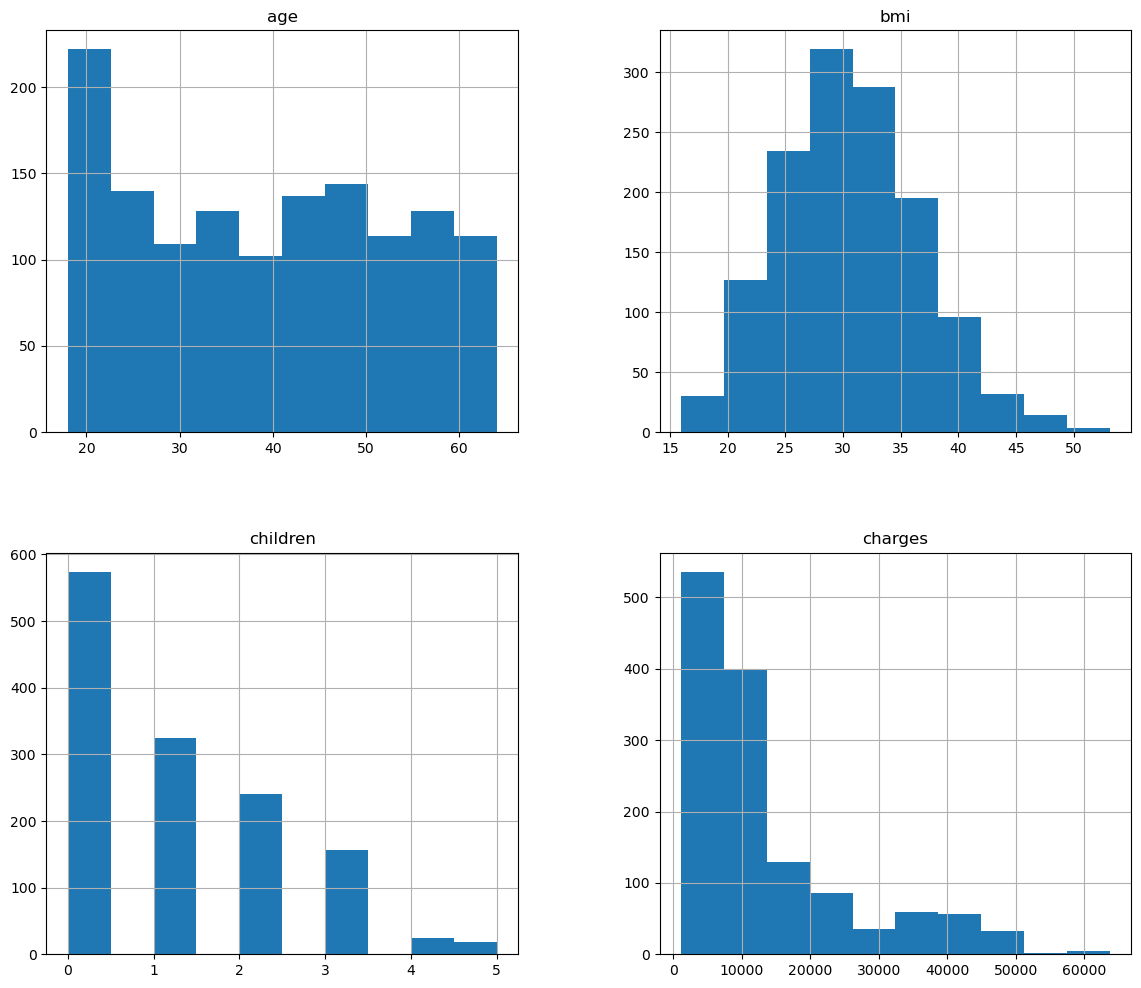

In [11]:
df.hist(figsize=(14,12))

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

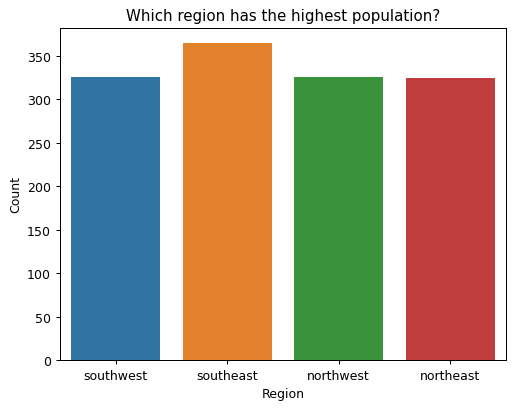

In [12]:
#region count
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(dpi=90)
sns.countplot(df, x = 'region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Which region has the highest population?')
df.region.value_counts()


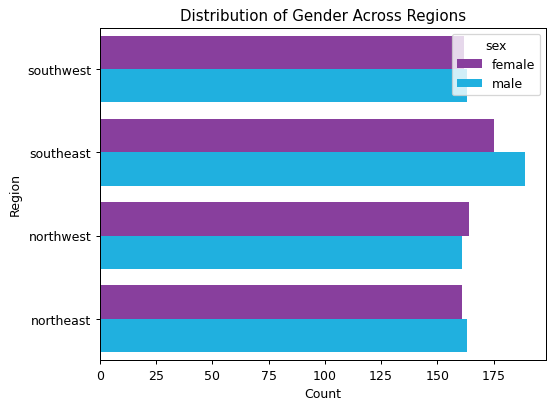

In [13]:
import matplotlib.pyplot as plt
plt.figure(dpi=90)
sns.countplot(y ='region', hue = "sex", data = df, palette = sns.color_palette(['#902fad', '#00c0ff'])) 
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Distribution of Gender Across Regions')
plt.show()

### Feature Engineering

In [14]:
df['region'] = df['region'].replace('southwest', 0)
df['region'] = df['region'].replace('southeast', 1)
df['region'] = df['region'].replace('northwest', 2)
df['region'] = df['region'].replace('northeast', 3)
df['sex'] = df['sex'].replace('female', 0)
df['sex'] = df['sex'].replace('male', 1)
df['smoker'] = df['smoker'].replace('yes', 1)
df['smoker'] = df['smoker'].replace('no', 0)

##### Calculate correlation between variables

In [15]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,-0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,-0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.002181,0.787251
region,-0.002127,-0.004588,-0.157566,-0.016569,0.002181,1.000000,0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,0.006208,1.000000


<Axes: >

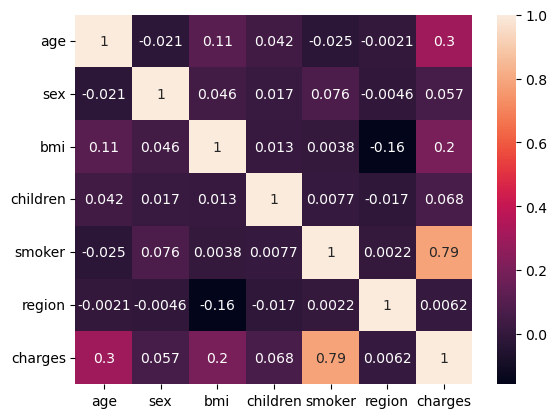

In [16]:
sns.heatmap(df.corr(), annot=True)

#### Log Transform skewed variables

In [17]:
print(df['age'].skew(), df['bmi'].skew(), df['children'].skew(), df['sex'].skew(), df['region'].skew(), df['smoker'].skew(), df['charges'].skew())

0.05567251565299186 0.2840471105987448 0.9383804401702414 -0.02095139743334541 0.038100508026419524 1.4647661601953743 1.5158796580240388


In [18]:
import numpy as np
print(np.log(df['children']).skew(), np.log(df['smoker']).skew(), np.log(df['charges'].skew()))

nan nan 0.41599590281868765


C:\Users\atber\anaconda3\Lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
#Transform charges columns 
df['charges'] = np.log(df['charges'])

<Axes: >

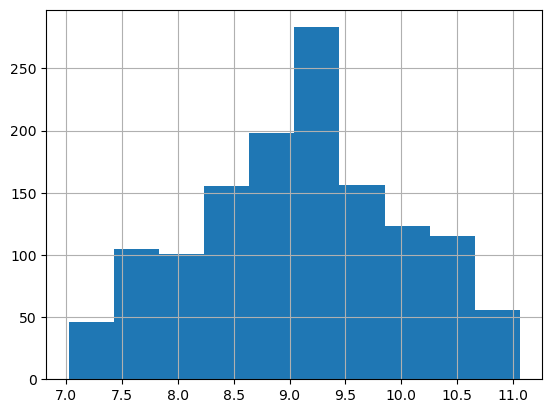

In [20]:
df['charges'].hist()

In [21]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
X = df.drop(columns = 'charges')
Y = df['charges']

##### Machine Learning Regression

In [22]:
lr = LinearRegression()
from sklearn.model_selection import train_test_split
X_train,  X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3)

In [23]:
lr.fit(X_train, Y_train)

LinearRegression()

In [24]:
lr.score(X_test,Y_test)
predicted = lr.predict(X_test)

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.pylab as plt
#plot_dis(y_test,predicted)
def  plot_dis(y,yhat):
    
    plt.figure()
    ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
    sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
    plt.legend()

In [26]:
lr.coef_


array([ 0.0347796 , -0.06742255,  0.01332054,  0.09904094,  1.54605671,
        0.03581044])

C:\Users\atber\AppData\Local\Temp\ipykernel_20788\1866387278.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
C:\Users\atber\AppData\Local\Temp\ipykernel_20788\1866387278.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

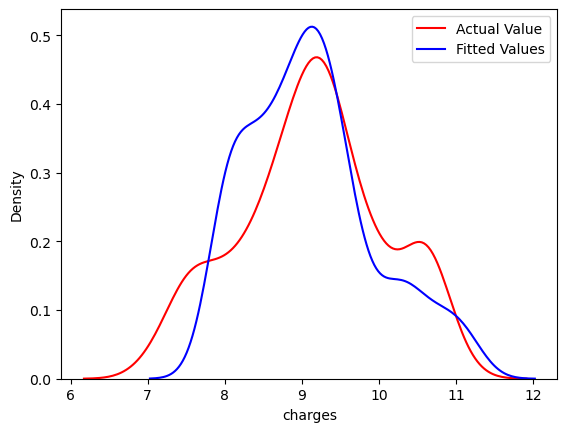

In [27]:
plot_dis(Y_test,predicted)

In [28]:
def plot_coef(X,model,name=None):
    

    plt.bar(X.columns[0:],abs(model.coef_[0:]))
    plt.xticks(rotation=90)
    plt.ylabel("$coefficients$")
    plt.title(name)
    plt.show()
    print("R^2 on training  data ",model.score(X_train, Y_train))
    print("R^2 on testing data ",model.score(X_test,Y_test))

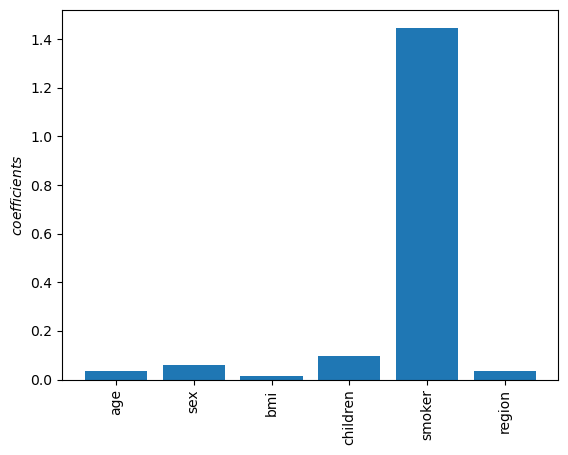

R^2 on training  data  0.7621592077355464
R^2 on testing data  0.7696288450846199


In [29]:
rr = Ridge(alpha=10)
rr.fit(X_train, Y_train)
plot_coef(X,rr)

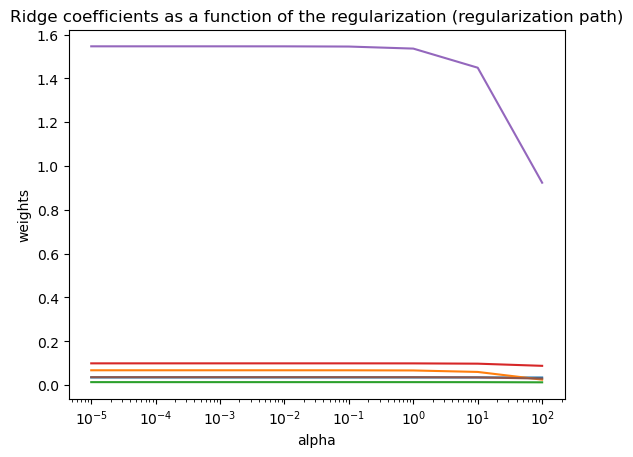

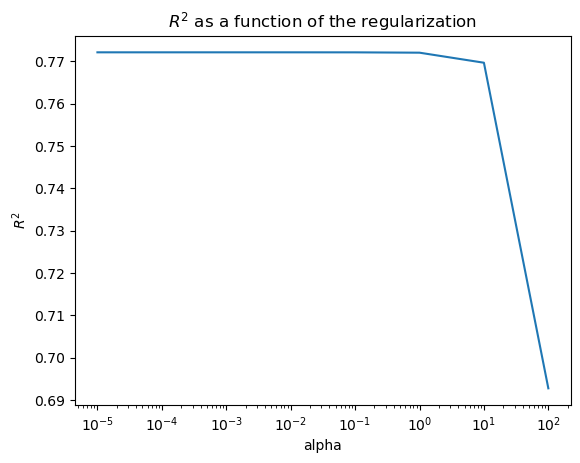

In [30]:
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
R_2=[]
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, Y_train)
    coefs.append(abs(ridge.coef_))
    R_2.append(ridge.score(X_test,Y_test))


ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization (regularization path)")
plt.show()


ax = plt.gca()
ax.plot(alphas, R_2)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("$R^2$")
plt.title("$R^2$ as a function of the regularization")
plt.show()   


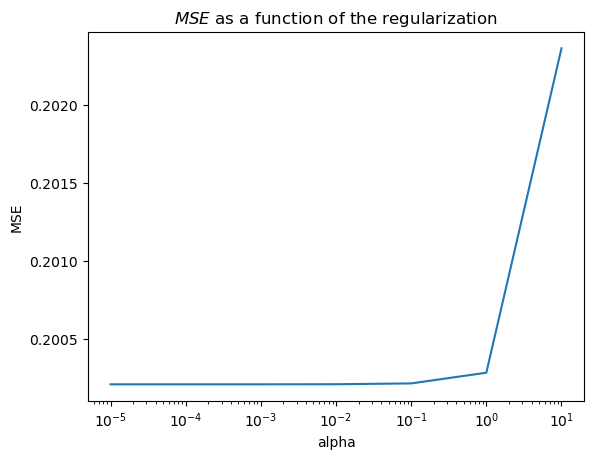

In [31]:
from sklearn.metrics import mean_squared_error
alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10]
MEAN_SQE=[]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, Y_train)
    MEAN_SQE.append(mean_squared_error(ridge.predict(X_test),Y_test))

ax = plt.gca()
ax.plot(alphas, MEAN_SQE)
ax.set_xscale("log")
plt.xlabel("alpha")
plt.ylabel("MSE")
plt.title("$MSE$ as a function of the regularization")
plt.show()

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
#X_trainstd = StandardScaler().fit_transform(X_train)
Input=[('polynomial', PolynomialFeatures(include_bias=False,degree=2)),('ss',StandardScaler() ), ('model', Ridge(alpha = 0.1))]
pipe = Pipeline(Input)
rf = RandomForestRegressor(max_depth= 4, n_estimators=200, min_samples_leaf = 1, min_samples_split=3, warm_start= True, random_state= 0)

In [33]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('ss', StandardScaler()), ('model', Ridge(alpha=0.1))])

In [34]:
pipe.score(X_test,Y_test)

0.8370132565336761

In [35]:
rf.fit(X_train,Y_train)

RandomForestRegressor(max_depth=4, min_samples_split=3, n_estimators=200,
                      random_state=0, warm_start=True)

In [36]:
rf.score(X_test,Y_test)

0.8269390477114454

In [37]:
param_grid = {
    'polynomial__degree': [1, 2, 3],
    'model__alpha': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
}
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(pipe, param_grid, n_jobs=1)

In [38]:
search.fit(X_train,Y_train)

GridSearchCV(estimator=Pipeline(steps=[('polynomial',
                                        PolynomialFeatures(include_bias=False)),
                                       ('ss', StandardScaler()),
                                       ('model', Ridge(alpha=0.1))]),
             n_jobs=1,
             param_grid={'model__alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1,
                                          10, 100],
                         'polynomial__degree': [1, 2, 3]})

In [39]:
best=search.best_estimator_
best.score(X_test,Y_test)

0.8370380006007165

In [40]:
cv_results = search.cv_results_
cv_results

{'mean_fit_time': array([0.00945568, 0.01071062, 0.01229148, 0.00931573, 0.01245437,
        0.01707964, 0.01185584, 0.01039267, 0.0117877 , 0.00971928,
        0.0110394 , 0.01226959, 0.01016026, 0.01052804, 0.01388693,
        0.00970039, 0.01059999, 0.01320958, 0.00978708, 0.01030817,
        0.01174994, 0.00885744, 0.01132264, 0.01313219]),
 'std_fit_time': array([0.00295499, 0.00207577, 0.00160016, 0.00132523, 0.00237402,
        0.00121685, 0.00082468, 0.00138573, 0.0019264 , 0.00138328,
        0.00109833, 0.00182379, 0.00168301, 0.00131693, 0.00172464,
        0.00172999, 0.00127107, 0.00167517, 0.00099325, 0.00119121,
        0.00158011, 0.00103412, 0.00180925, 0.00141788]),
 'mean_score_time': array([0.00368967, 0.00402007, 0.00484295, 0.00438776, 0.00507498,
        0.00583253, 0.00491462, 0.00399032, 0.00518084, 0.00478368,
        0.00504737, 0.00445938, 0.00397687, 0.00452762, 0.00525527,
        0.00392146, 0.00477724, 0.00533404, 0.00420856, 0.00370684,
        0.004582

In [41]:
from sklearn.model_selection import KFold
kf = KFold(n_splits= 10, shuffle = True)

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X, Y, cv=kf)

In [43]:
scores

array([0.85331477, 0.77335866, 0.81486859, 0.76246789, 0.84561237,
       0.81752087, 0.85938486, 0.8059939 , 0.89100893, 0.89044883])

In [44]:
np.mean(scores)

0.8313979665165288